In [31]:
import pandas as pd

# Barplot

In [32]:
bar_paths = [
    "../tables/rn18/cifar10/kta_rn18_c10_ex75-9.zip",
    "../tables/gar/cifar10/kta_gar_c10_ex75-9.zip",
    "../tables/gar/f_mnist/kta_gar_fm_ex75-9.zip",
]

In [33]:
bars = pd.DataFrame()
for path in bar_paths:
    bars = bars.append(pd.read_pickle(path))

bars.drop(bars.index[bars["approx_type"] == "layers"], inplace=True)
bars

,kt,acc_type,approx_type,dataset,model
0,0.701095,log_valid_error_before_ft,relative_norm_weight,CIFAR-10,ResNet-18
1,0.565728,log_valid_error,relative_norm_weight,CIFAR-10,ResNet-18
2,0.521909,log_test_error_before_ft,relative_norm_weight,CIFAR-10,ResNet-18
3,0.572770,log_test_error,relative_norm_weight,CIFAR-10,ResNet-18
4,0.692488,log_valid_error_before_ft,relative_norm,CIFAR-10,ResNet-18
...,...,...,...,...,...
19,0.622222,log_test_error,diff_norm_weight,F-MNIST,GaripovNet
20,0.691919,log_valid_error_before_ft,norm_diff,F-MNIST,GaripovNet
21,0.416162,log_valid_error,norm_diff,F-MNIST,GaripovNet
22,0.700000,log_test_error_before_ft,norm_diff,F-MNIST,GaripovNet


In [34]:
bars['model & dataset'] = bars['model'] +" & "+ bars['dataset']

In [35]:
replacements = {
    'valid_acc_before_ft': "Validation accuracy before fine-tuning", 
    'valid_acc': "Validation accuracy after fine-tuning",
    'test_acc': "Test accuracy after fine-tuning", 
    'relative_norm_weight': 'Relative Weights',
    'scaled_norm_weight': 'Scaled Weights',
    'diff_norm_weight': 'Absolute Weights',
    'relative_norm': 'Relative Features',
    'scaled_norm': 'Scaled Features',
    'norm_diff': 'Absolute Features',
    'log_valid_error_before_ft': 'Validation error before fine-tuning',
    'log_valid_error': 'Validation error after fine-tuning',
    'log_test_error': 'With fine-tuning',
    'log_test_error_before_ft': 'Without fine-tuning',
    # 'log_norm_diff': 'Log norm of the Absolute between training features',
}
bars_neat = bars.replace(replacements)

/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


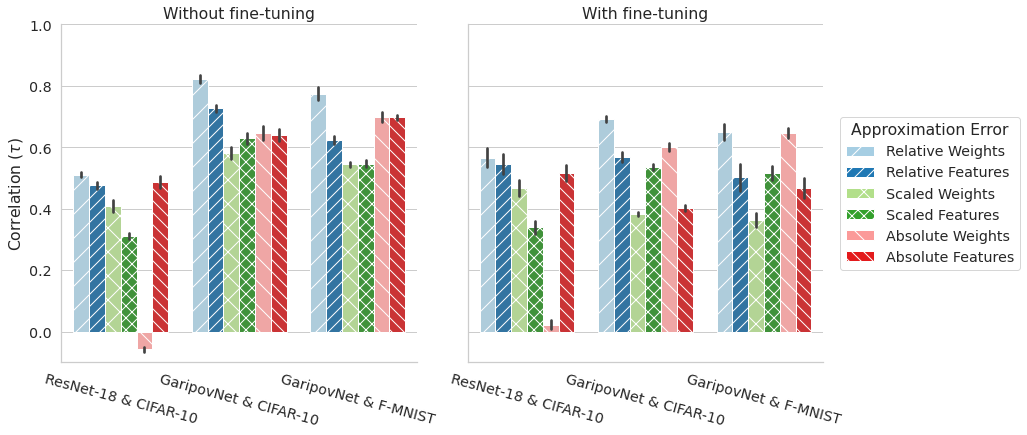

In [54]:
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="whitegrid", font_scale=1.3)
# sns.set(font_scale=1.2)


performance_measures = [
    # "Validation error before fine-tuning",
    # "Validation error after fine-tuning",
    "Without fine-tuning",
    "With fine-tuning",
]

df_before_after = bars_neat.loc[bars_neat['acc_type'].isin(performance_measures)]
df_before_after.rename(columns = {'acc_type':'Performance measure'}, inplace=True)


titles = [
    'Performance measure'
]
col_order = ['Without fine-tuning','With fine-tuning']
hatches = ["/"]*3 + ["//"]*3 + ["x"]*3 + ["xx"]*3 + ["\\"]*3 + ["\\\\"]*3
# legend_hatches = ["/","//","-","--","\\","\\\\"]
colors = sns.color_palette("Paired")
circ0 = mpatches.Patch(facecolor=colors[0],hatch='/',label='Relative Weights')
circ1 = mpatches.Patch(facecolor=colors[1],hatch='//',label='Relative Features')
circ2 = mpatches.Patch(facecolor=colors[2],hatch='x',label='Scaled Weights')
circ3 = mpatches.Patch(facecolor=colors[3],hatch='xx',label='Scaled Features')
circ4 = mpatches.Patch(facecolor=colors[4],hatch='\\',label='Absolute Weights')
circ5 = mpatches.Patch(facecolor=colors[5],hatch='\\\\',label='Absolute Features')

g = sns.catplot(
    data=df_before_after, 
    kind="bar",
    x="model & dataset", #'approx_type',
    y="kt",
    hue="approx_type", #'acc_type',
    ci="sd", 
    palette=colors, 
    # alpha=.6, 
    height=6,
    col= 'Performance measure', # "model & dataset",
    col_order=col_order,
    # fill=False,
    # hatch=["/"],
    # row="model", 
    legend=False,
)
# g.despine(left=True)
g.set_axis_labels("", r"Correlation $(\tau$)")
# g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
for i in range(1):
    for j in range(2):
        gax = g.axes[i][j]
        for k,thisbar in enumerate(gax.patches):
        # Set a different hatch for each bar
            # print(k)
            thisbar.set_hatch(hatches[k])
        # xlabel = gax.get_xlabel()
        # ylabel = gax.get_ylabel()
        # print(xlabel)
        # if xlabel in replacements.keys():
        #     print(xlabel)
        #     g.axes[i][j].set_xlabel(replacements[xlabel])
        gax.set_xticklabels(gax.get_xticklabels(),rotation = -15, fontdict={'horizontalalignment':'center'})# 'center', 'left', 'right')
        gax.set_title(col_order[j])
    
gax.legend(handles=[circ0,circ1,circ2,circ3,circ4,circ5],title="Approximation Error",loc='center',bbox_to_anchor=(1.3, 0.5))
# g.legend.set_title("Approximation Error")
g.set(ylim=(-0.1,1))

# g.legend(hatches=["/","//","-","--","\\","\\\\"])
# sns.move_legend(g, "lower center", bbox_to_anchor=(.4, 1), ncol=3, title=None, frameon=False)

g.savefig("../plots/kta_bar_errors_performances_before_after_test_ex75-90_hatch_git.pdf")

## across layers (ceteris paribus)

In [37]:
bar_paths_layers = [
    "../tables/rn18/cifar10/kta_rn18_c10_across_layers_ex75-9.zip",
    "../tables/gar/cifar10/kta_gar_c10_across_layers_ex75-9.zip",
    "../tables/gar/f_mnist/kta_gar_fm_across_layers_ex75-9.zip",
]
bars_layers = pd.DataFrame()
for path in bar_paths_layers:
    bars_layers = bars_layers.append(pd.read_pickle(path))
bars_layers['model & dataset'] = bars_layers['model'] +" & "+ bars_layers['dataset']
replacements_layers = {
    'valid_acc_before_ft': "Validation accuracy before fine-tuning", 
    'valid_acc': "Validation accuracy after fine-tuning",
    'test_acc': "Test accuracy after fine-tuning", 
    'relative_norm_weight': 'Relative Weights',
    'scaled_norm_weight': 'Scaled Weights',
    'diff_norm_weight': 'Absolute Weights',
    'relative_norm': 'Relative Features',
    'scaled_norm': 'Scaled Features',
    'norm_diff': 'Absolute Features',
    'log_valid_error_before_ft': 'Validation error before fine-tuning',
    'log_valid_error': 'Validation error after fine-tuning',
    'log_test_error_before_ft': 'Without fine-tuning',
    'log_test_error': 'With fine-tuning'
    # 'log_norm_diff': 'Log norm of the Absolute between training features',
}
bars_layers_neat = bars_layers.replace(replacements_layers)
performance_measures = [
    # "Validation error before fine-tuning",
    # "Validation error after fine-tuning",
    "Without fine-tuning",
    "With fine-tuning",
]

df_before_after_layers = bars_layers_neat.loc[bars_layers_neat['performance_metric'].isin(performance_measures)]
df_before_after_layers.rename(columns = {'performance_metric':'Performance measure'}, inplace=True)

/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [38]:
df_before_after_layers_mean = df_before_after_layers.groupby(by=['Performance measure','approximation_error','model & dataset','run'])['kt'].mean().reset_index()
df_before_after_layers_mean

,Performance measure,approximation_error,model & dataset,run,kt
0,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,0,-0.033333
1,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,1,-0.033333
2,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,2,0.066667
3,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,3,0.066667
4,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,4,0.011111
...,...,...,...,...,...
175,Without fine-tuning,Scaled Weights,ResNet-18 & CIFAR-10,0,0.349206
176,Without fine-tuning,Scaled Weights,ResNet-18 & CIFAR-10,1,0.341270
177,Without fine-tuning,Scaled Weights,ResNet-18 & CIFAR-10,2,0.297619
178,Without fine-tuning,Scaled Weights,ResNet-18 & CIFAR-10,3,0.333333


## across decompositions (ceteris paribus)

In [40]:
bar_paths_facts = [
    "../tables/rn18/cifar10/kta_rn18_c10_across_facts_ex75-9.zip",
    "../tables/gar/cifar10/kta_gar_c10_across_facts_ex75-9.zip",
    "../tables/gar/f_mnist/kta_gar_fm_across_facts_ex75-9.zip",
]
bars_facts = pd.DataFrame()
for path in bar_paths_facts:
    bars_facts = bars_facts.append(pd.read_pickle(path))
bars_facts['model & dataset'] = bars_facts['model'] +" & "+ bars_facts['dataset']
replacements_facts = {
    'valid_acc_before_ft': "Validation accuracy before fine-tuning", 
    'valid_acc': "Validation accuracy after fine-tuning",
    'test_acc': "Test accuracy after fine-tuning", 
    'relative_norm_weight': 'Relative Weights',
    'scaled_norm_weight': 'Scaled Weights',
    'diff_norm_weight': 'Absolute Weights',
    'relative_norm': 'Relative Features',
    'scaled_norm': 'Scaled Features',
    'norm_diff': 'Absolute Features',
    'log_valid_error_before_ft': 'Validation error before fine-tuning',
    'log_valid_error': 'Validation error after fine-tuning',
    'log_test_error_before_ft': 'Without fine-tuning',
    'log_test_error': 'With fine-tuning'
    # 'log_norm_diff': 'Log norm of the Absolute between training features',
}
bars_facts_neat = bars_facts.replace(replacements_facts)
performance_measures = [
    # "Validation error before fine-tuning",
    # "Validation error after fine-tuning",
    "Without fine-tuning",
    "With fine-tuning",
]

df_before_after_facts = bars_facts_neat.loc[bars_facts_neat['performance_metric'].isin(performance_measures)]
df_before_after_facts.rename(columns = {'performance_metric':'Performance measure'}, inplace=True)

/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [41]:
df_before_after_facts_mean = df_before_after_facts.groupby(by=['Performance measure','approximation_error','model & dataset','run'])['kt'].mean().reset_index()
df_before_after_facts_mean

,Performance measure,approximation_error,model & dataset,run,kt
0,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,0,0.288889
1,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,1,0.466667
2,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,2,0.333333
3,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,3,0.355556
4,With fine-tuning,Absolute Features,GaripovNet & CIFAR-10,4,0.444444
...,...,...,...,...,...
175,Without fine-tuning,Scaled Weights,ResNet-18 & CIFAR-10,0,0.555556
176,Without fine-tuning,Scaled Weights,ResNet-18 & CIFAR-10,1,0.597222
177,Without fine-tuning,Scaled Weights,ResNet-18 & CIFAR-10,2,0.513889
178,Without fine-tuning,Scaled Weights,ResNet-18 & CIFAR-10,3,0.527778


## All, Layers and Decompositions

In [42]:
df_all = df_before_after # this is ex 75 and 90
df_layers = df_before_after_layers_mean
df_decompositions = df_before_after_facts_mean

In [43]:
df_all['group'] = 'all'
df_layers['group'] = 'layers'
df_decompositions['group'] = 'decompositions'

/tmp/ipykernel_117249/3502426794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['group'] = 'all'


In [44]:
df_ = df_all.append(df_layers).append(df_decompositions)

In [45]:
df_rw = df_[(df_['approx_type']=='Relative Weights') | (df_['approximation_error']=='Relative Weights')]

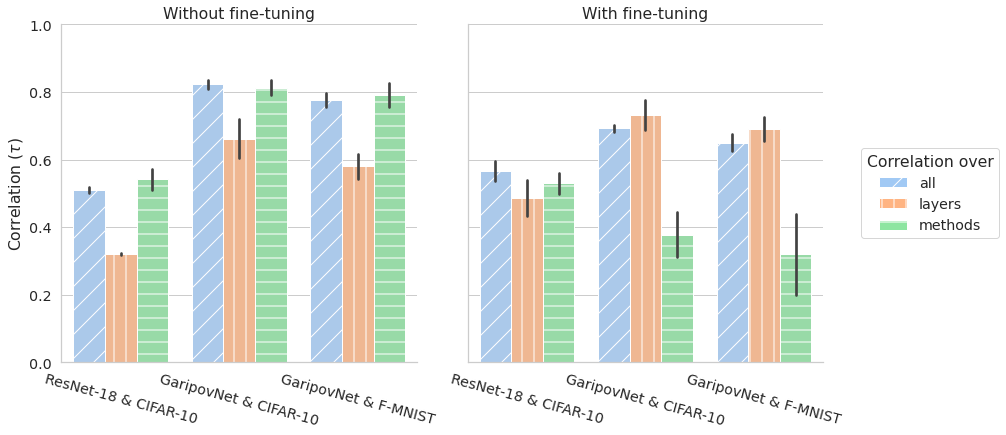

In [53]:
import seaborn as sns
import matplotlib.patches as mpatches

sns.set_theme(style="whitegrid", font_scale=1.3)

titles = [
    'Performance measure'
]

# hue_order = ['Relative Weights','Relative Features']
order = ['ResNet-18 & CIFAR-10','GaripovNet & CIFAR-10','GaripovNet & F-MNIST']
col_order = ['Without fine-tuning','With fine-tuning']

hatches = ["/"]*3 + ["|"]*3 + ["-"]*3 # + [".."]*3 + ["\\"]*3 + ["\\\\"]*3
# legend_hatches = ["/","x","\\"] #,"--","\\","\\\\"]
colors = sns.color_palette('pastel')
circ0 = mpatches.Patch(facecolor=colors[0],hatch='/',label='all')
circ1 = mpatches.Patch(facecolor=colors[1],hatch='|',label='layers')
circ2 = mpatches.Patch(facecolor=colors[2],hatch='-',label='methods')
# circ3 = mpatches.Patch(facecolor=colors[3],hatch='..',label='Scaled Features')
# circ4 = mpatches.Patch(facecolor=colors[4],hatch='\\',label='Absolute Weights')
# circ5 = mpatches.Patch(facecolor=colors[5],hatch='\\\\',label='Absolute Features')

g = sns.catplot(
    data=df_rw,
    kind="bar",
    x="model & dataset",
    y="kt",
    hue="group",
    ci="sd", 
    palette=colors, #sns.color_palette("Paired"), # "dark", 
    # alpha=.6, 
    height=6,
    col= 'Performance measure',# "model & dataset",
    # row="model", 
    # hue_order=hue_order,
    order=order,
    col_order=col_order,
    legend=False,
)
# g.despine(left=True)
g.set_axis_labels("", r"Correlation $(\tau$)")
# g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
# g.legend.set_title("Correlation over")
g.set(ylim=(0,1))
for i in range(1):
    for j in range(2):
        gax = g.axes[i][j]
        for k,thisbar in enumerate(gax.patches):
        # Set a different hatch for each bar
            # print(k)
            thisbar.set_hatch(hatches[k])
        # xlabel = gax.get_xlabel()
        # ylabel = gax.get_ylabel()
        # print(xlabel)
        # if xlabel in replacements.keys():
        #     print(xlabel)
        #     g.axes[i][j].set_xlabel(replacements[xlabel])

        gax.set_xticklabels(gax.get_xticklabels(),rotation = -15, fontdict={'horizontalalignment':'center'})# 'center', 'left', 'right')
        gax.set_title(col_order[j])
    
gax.legend(handles=[circ0,circ1,circ2],title="Correlation over",loc='center',bbox_to_anchor=(1.3, 0.5))


g.savefig("../plots/kta_bar_errors_performances_before_after_test_all_layers_facts_hatch_git.pdf")

## Grouped by rank

In [47]:
bar_paths_facts = [
    "../tables/rn18/cifar10/kta_rn18_c10_across_layer_facts_incl75-9.zip",
    "../tables/gar/cifar10/kta_gar_c10_across_layer_facts_incl75-9.zip",
    "../tables/gar/f_mnist/kta_gar_fm_across_layer_facts_incl75-9.zip",
]
bars_facts = pd.DataFrame()
for path in bar_paths_facts:
    bars_facts = bars_facts.append(pd.read_pickle(path))
bars_facts['model & dataset'] = bars_facts['model'] +" & "+ bars_facts['dataset']
replacements_facts = {
    'valid_acc_before_ft': "Validation accuracy before fine-tuning", 
    'valid_acc': "Validation accuracy after fine-tuning",
    'test_acc': "Test accuracy after fine-tuning", 
    'relative_norm_weight': 'Relative Weights',
    'scaled_norm_weight': 'Scaled Weights',
    'diff_norm_weight': 'Absolute Weights',
    'relative_norm': 'Relative Features',
    'scaled_norm': 'Scaled Features',
    'norm_diff': 'Absolute Features',
    'log_valid_error_before_ft': 'Validation error before fine-tuning',
    'log_valid_error': 'Validation error after fine-tuning',
    'log_test_error_before_ft': 'Without fine-tuning',
    'log_test_error': 'With fine-tuning'
    # 'log_norm_diff': 'Log norm of the Absolute between training features',
}
bars_facts_neat = bars_facts.replace(replacements_facts)
performance_measures = [
    # "Validation error before fine-tuning",
    # "Validation error after fine-tuning",
    "Without fine-tuning",
    "With fine-tuning",
]

df_before_after_facts = bars_facts_neat.loc[bars_facts_neat['performance_metric'].isin(performance_measures)]
df_before_after_facts.rename(columns = {'performance_metric':'Performance measure'}, inplace=True)

In [48]:
df_before_after_facts['compression'] = 1 - df_before_after_facts['rank']
df_before_after_facts['compression'] = df_before_after_facts['compression'].round(2)

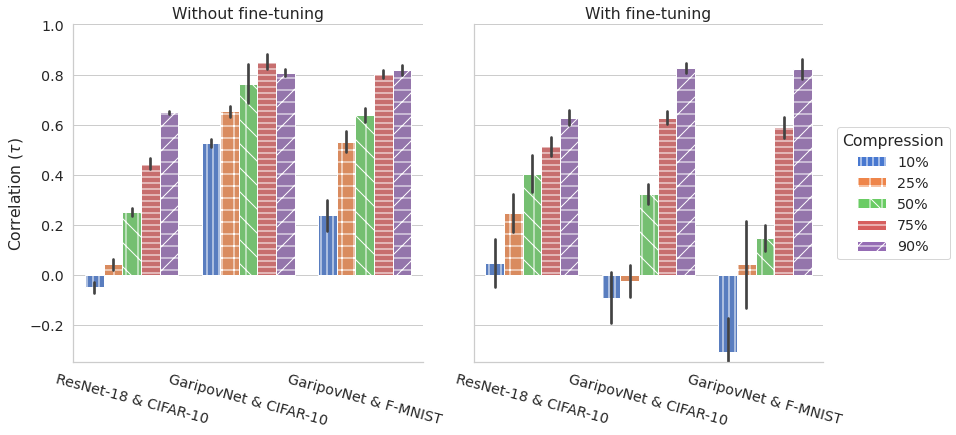

In [52]:
import seaborn as sns
import matplotlib.patches as mpatches

sns.set_theme(style="whitegrid", font_scale=1.3)

titles = [
    'Performance measure'
]

# hue_order = [0.1, 0.25, .5, .75, .9]
order = ['ResNet-18 & CIFAR-10','GaripovNet & CIFAR-10','GaripovNet & F-MNIST']
col_order = ['Without fine-tuning','With fine-tuning']
hatches = ["||"]*3 + ["+"]*3 + ["\\|"]*3 + ["--"]*3 + ["-/"]*3 #+ ["\\\\"]*3
legend_hatches = ["||","+","\\|","--","-/"] #,"--","\\","\\\\"]
colors = sns.color_palette("muted")
circ0 = mpatches.Patch(facecolor=colors[0],hatch='||',label='10%')
circ1 = mpatches.Patch(facecolor=colors[1],hatch='+',label='25%')
circ2 = mpatches.Patch(facecolor=colors[2],hatch='\\|',label='50%')
circ3 = mpatches.Patch(facecolor=colors[3],hatch='--',label='75%')
circ4 = mpatches.Patch(facecolor=colors[4],hatch='-/',label='90%')

g = sns.catplot(
    data=df_before_after_facts[df_before_after_facts.approximation_error.isin(['Relative Weights'])],
    kind="bar",
    x="model & dataset",
    y="kt",
    hue="compression",
    ci="sd", 
    palette=colors,# , # "dark", 
    # alpha=.6, 
    height=6,
    col= 'Performance measure',# "model & dataset",
    # row="model", 
    # hue_order=hue_order,
    order=order,
    col_order=col_order,
    legend=False,
)
# g.despine(left=True)
g.set_axis_labels("", r"Correlation $(\tau)$")
# g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
        #   fancybox=True, shadow=True, ncol=5)
g.set(ylim=(-0.35,1))
for i in range(1):
    for j in range(2):
        gax = g.axes[i][j]
        for k,thisbar in enumerate(gax.patches):
        # Set a different hatch for each bar
            # print(k)
            thisbar.set_hatch(hatches[k])
        # xlabel = gax.get_xlabel()
        # ylabel = gax.get_ylabel()
        # print(xlabel)
        # if xlabel in replacements.keys():
        #     print(xlabel)
        #     g.axes[i][j].set_xlabel(replacements[xlabel])
        gax.set_xticklabels(gax.get_xticklabels(),rotation = -15, fontdict={'horizontalalignment':'center'})# 'center', 'left', 'right')
        gax.set_title(col_order[j])

gax.legend(handles=[circ0,circ1,circ2,circ3,circ4],title="Compression",loc='center',bbox_to_anchor=(1.2, 0.5))
# sns.move_legend(
#     g, "right", 
#     # bbox_to_anchor=(1.02, 0.5),
#     title="Compression", frameon=False
# )

g.savefig("../plots/kta_bar_errors_performances_before_after_test_comp_hatch_git.pdf")

# Appendix

In [56]:
from pathlib import Path
import numpy as np
from tddl.post_processing.create_tables import load_df

df = load_df(
    logdir = Path("/bigdata/cifar10/logs/decomposed"),
    tt_conversion = Path("/home/jetzeschuurman/gitProjects/phd/tddl/papers/iclr_2023/configs/rn18/rn18_tt_actual_rank_to_tl_ranks.json"),
)

/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fe7a218dca0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


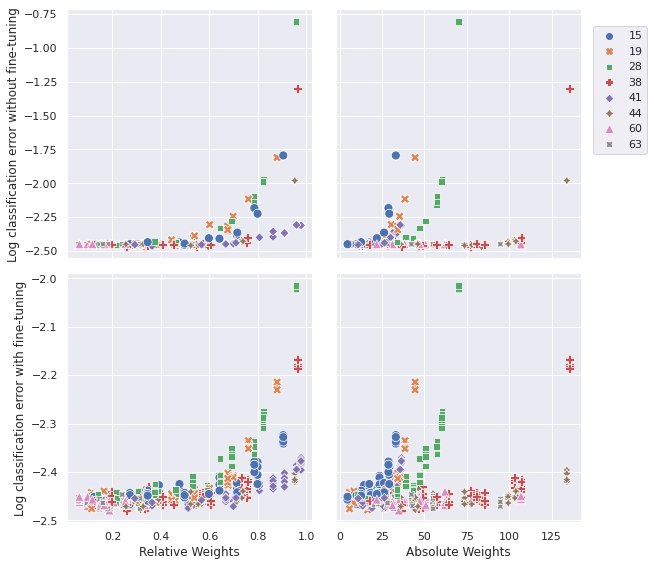

In [59]:
from matplotlib import pyplot as plt 
# import seaborn as sns
sns.set_theme(style="darkgrid")

replacements = {
    # 'valid_acc_before_ft': "Validation accuracy before fine-tuning", 
    # 'valid_acc': "Validation accuracy after fine-tuning",
    # 'test_acc': "Test accuracy after fine-tuning", 
    # 'error': 'Relative norm on weights',
    # 'relative_norm': 'Relative norm on training features',
    # 'scaled_norm': 'Scaled norm on training features',
    # 'norm_diff': 'Absolute norm on training features',
    # 'log_norm_diff': 'Log absolute norm on training features',
    'log_test_error_before_ft': "Log classification error without fine-tuning",
    'log_test_error':"Log classification error with fine-tuning",
    'relative_norm_weight': "Relative Weights",
    'diff_norm_weight': "Absolute Weights",
}

metrics=['test_error_before_ft','test_error']
log_metrics=['log_test_error_before_ft','log_test_error']
errors=['relative_norm_weight','diff_norm_weight'] # 'relative_norm','scaled_norm_weight','scaled_norm',,'norm_diff'

g = sns.PairGrid(
    df,
    y_vars=log_metrics, 
    x_vars=errors, # "error"
    height=4,
)
g.map(lambda x, y, **kwargs: sns.scatterplot(x=x,y=y,hue=df.layers,style=df.layers,legend='auto',s=80)) # color=".3")
# g.set(ylim=(0.86,0.925))
g.add_legend()

def error(accuracy):
    return 1-accuracy

def log_error(accuracy):
    return np.log(1-accuracy)

for i in range(2):
    for j in range(2):
        gax = g.axes[i][j]
#         gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
plt.legend(
    bbox_to_anchor=(1.05, 1,1,1),
    loc='upper left', borderaxespad=0.
    # loc='right',
    # bbox_to_anchor=(1.1, 0.5, 0, 0),
)
# g.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.5, 0, 0))

g.savefig("../plots/rn18_scatter_relative_absolute_git.pdf")